# Perceptron Logic Gates

In this project, we will use perceptrons to model the fundamental building blocks of computers — logic gates.

<img src="Images/logic_gates.svg" width="600">

For example, the table below shows the results of an AND gate. Given two inputs, an AND gate will output a `1` only if both inputs are a `1`:

| Input 1 | Input 2 | Output |
|---------|---------|--------|
|    0    |    0    |   0    |
|    0    |    1    |   0    |
|    1    |    0    |   0    |
|    1    |    1    |   1    |

We’ll discuss how an AND gate can be thought of as linearly separable data and train a perceptron to perform AND.

We’ll also investigate an XOR gate — a gate that outputs a `1` only if one of the inputs is a `1`:

| Input 1 | Input 2 | Output |
|---------|---------|--------|
|    0    |    0    |   0    |
|    0    |    1    |   1    |
|    1    |    0    |   1    |
|    1    |    1    |   0    |

We’ll think about why an XOR gate isn’t linearly separable and show how a perceptron fails to learn XOR.

In [1]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

## 1.

- To begin, let’s think of an AND gate as a dataset of four points. 
- The four points should be the four possible inputs to the AND gate. 
- For example, the first point in the dataset should be `[0, 0]`.
- Create a variable named `data` that is a list that contains the four possible inputs to an AND gate.

In [2]:
data = [[0, 0], [0, 1], [1, 0], [1, 1]]

## 2.

- Each data point should have a label associated with it. 
- The label will be the result of the AND gate given the input.
- Create a variable named `labels`. 
- This should be a list where each label corresponds to a point in `data`. 
- For example, if the last item in `data` is `[1, 1]`, the last label should be `1`.

In [3]:
labels = [0, 0, 0, 1]

## 3.

- Let’s plot these four points on a graph.
- Call `plt.scatter()` using three parameters:
    - The first parameter should be a list of the x values of each point. You can get this using list comprehension — `[point[0] for point in data]`.
    - The second parameter should be a list of the y values of each point. 
    - The third parameter should be `c = labels`. This will make the points with label `1` a different color than points with label `0`.
- After calling `plt.scatter()` call `plt.show()`. As you continue to write your code, make sure `plt.show()` is always the last line of code.
- Why is this data linearly separable?

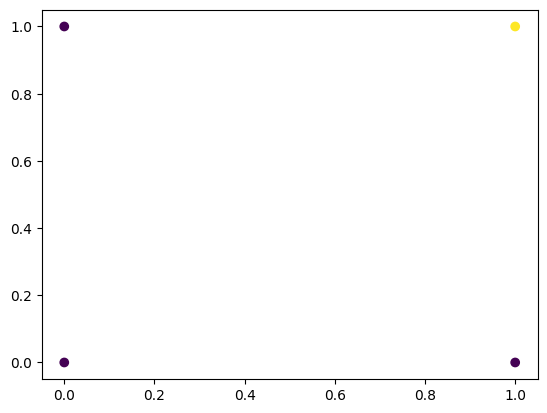

In [4]:
plt.scatter([point[0] for point in data], [point[1] for point in data], c=labels)
plt.show()

It's linearly separable because you can draw a straight line that separates the points with label `0` from the points with label `1`.

## 4.

- Now that we have our data, let’s build a perceptron to learn AND. 
- Create a `Perceptron` object named `classifier`. 
- For now, set the parameter `max_iter` to `40`, and set `random_state` to `22`.
- `max_iter` sets the number of times the perceptron loops through the training data. 
- The default is `1000`, so we’re cutting the training pretty short! 
- Let’s see if our algorithm learns AND, even with very little training.

In [5]:
classifier = Perceptron(max_iter=40, random_state=22)

## 5.

- We’ll now train the model. 
- Call the `.fit()` method using `data` and `labels` as parameters.

In [6]:
classifier.fit(data, labels)

Perceptron(max_iter=40, random_state=22)

## 6.

- Let’s see if the algorithm learned AND. 
- Call `classifier`‘s `.score()` method using `data` and `labels` as parameters. 
- Print the results. 
- This will print the accuracy of the model on the data points.
- Note that it is pretty unusual to train and test on the same dataset. 
- In this case, since there are only four possible inputs to AND, we’re stuck training on every possible input and testing on those same points.

In [7]:
classifier.score(data, labels)

1.0

## 7.

- Your perceptron should have 100% accuracy!
-  You just taught it an AND gate!
- Let’s change the labels so your data now represents an XOR gate. 
- The label should be a `1` only if one of the inputs is a `1`. 
- What is the accuracy of the perceptron now? 
- Is the data linearly separable?

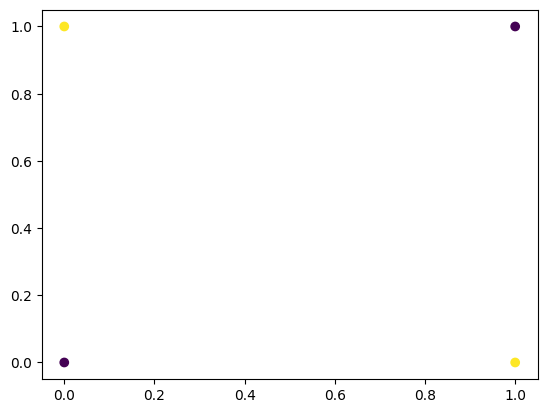

In [8]:
labels_xor = [0, 1, 1, 0]

plt.scatter([point[0] for point in data], [point[1] for point in data], c=labels_xor)
plt.show()

In [9]:
classifier = Perceptron(max_iter=40, random_state=22)
classifier.fit(data, labels_xor)
classifier.score(data, labels_xor)

0.5

## 8.

- Try changing the data to represent an OR gate. 
- The label of a point should be a `1` if *any* of the input values are a `1`.
- Before running your code, predict what will happen. 
- Is the data linearly separable? 
- What do you expect the accuracy of the perceptron to be?

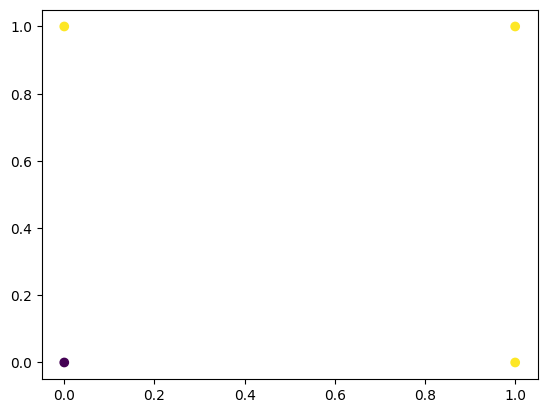

In [10]:
labels_or = [0, 1, 1, 1]

plt.scatter([point[0] for point in data], [point[1] for point in data], c=labels_or)
plt.show()

In [11]:
classifier = Perceptron(max_iter=40, random_state=22)
classifier.fit(data, labels_or)
classifier.score(data, labels_or)

1.0

## 9.

- We know the perceptron has been trained correctly, but let’s try to visualize what decision boundary it is making. 
- Reset your labels to be representing an AND gate.
- Let’s first investigate the classifier’s `.decision_function()` method. 
- Given a list of points, this method returns the distance those points are from the decision boundary. 
- The closer the number is to `0`, the closer that point is to the decision boundary.
- Try calling `classifier`‘s `.decision_function()` method using `[[0, 0], [1, 1], [0.5, 0.5]]` as a parameter. 
- Print the results.
- Is the point `[0, 0]` or the point `[1, 1]` closer to the decision boundary?

In [12]:
classifier.decision_function([[0, 0], [1, 1], [0.5, 0.5]])

array([-1.,  3.,  1.])

## 10.

- Even though an input like `[0.5, 0.5]` isn’t a real input to an AND logic gate, we can still check to see how far it is from the decision boundary.
- We could also do this to the point `[0, 0.1]`, `[0, 0.2]` and so on. 
- If we do this for a grid of points, we can make a heat map that reveals the decision boundary.
- To begin, we need to create a list of the points we want to input to `.decision_function()`.
- Begin by creating a list named `x_values`. 
- `x_values` should be a list of 100 evenly spaced decimals between `0` and `1`. 
- `np.linspace(0, 1, 100)` will do this.
- Do the same for `y_values`.

In [13]:
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)

## 11.

- We have a list of 100 x values and 100 y values. 
- We now want to find every possible combination of those x and y values.
- The function product will do this for you. For example, consider the following code:
    ```python
    list(product([1, 2, 3], [4, 5, 6]))
    ```
- This code will produces the following list:
    ```python
    [(1, 4), (1, 5), (1, 6), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6)]
    ```
- Call `product()` using `x_values` and `y_values` as paramters. 
- Don’t forget to put `list()` around the call to `product()`. 
- Store the result in a variable named `point_grid`.

In [14]:
point_grid = list(product(x_values, y_values))

## 12.

- Call `classifier`‘s `.decision_function()` method using `point_grid` as a parameter. 
- Store the results in a variable named `distances`.

In [15]:
distances = classifier.decision_function(point_grid)
distances[:5]

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192])

## 13.

- Right now `distances` stores positive and negative values. 
- We only care about how far away a point is from the boundary — we don’t care about the sign.
- Take the absolute value of every distance. 
- Use list comprehension to call `abs()` on every point in the list and store it in a new variable called `abs_distances`.

In [16]:
abs_distances = list(map(abs, distances))
abs_distances[:5]

[np.float64(1.0),
 np.float64(0.9797979797979798),
 np.float64(0.9595959595959596),
 np.float64(0.9393939393939394),
 np.float64(0.9191919191919192)]

## 14.

- We’re almost ready to draw the heat map. 
- We’re going to be using Matplotlib’s `pcolormesh()` function.
- Right now, `abs_distances` is a list of `10000` numbers. 
- `pcolormesh` needs a two dimensional list. 
- We need to turn `abs_distances` into a 100 by 100 two dimensional array.
- Numpy’s `reshape` function does this for us. 
- The code below turns list `lst` into a 2 by 2 list.
    ```python
    lst = [1, 2 ,3, 4]
    new_lst = np.reshape(lst, (2, 2))
    ```
- `new_lst` now looks like this:
    ```python
    [[1, 2],
     [3, 4]]
    ```
- Turn `abs_distances` into a 100 by 100 list and name it `distances_matrix`.

In [17]:
distances_matrix = np.array(abs_distances).reshape(100, 100)
distances_matrix.shape

(100, 100)

## 15.

- It’s finally time to draw the heat map! 
- Call `plt.pcolormesh()` with the following three parameters:
    - `x_values`
    - `y_values`
    - `distances_matrix`
- Save the result in a variable named `heatmap`.
- Then call `plt.colorbar()` using `heatmap` as a parameter. 
- This will put a legend on the heat map.
- Make sure `plt.show()` is still below these function calls.

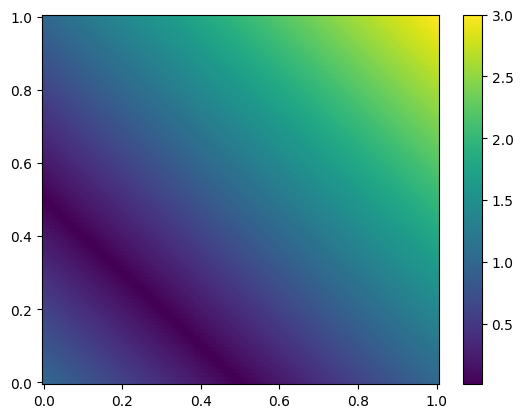

In [18]:
heatmap = plt.pcolormesh(x_values, y_values, distances_matrix)
plt.colorbar(heatmap)
plt.show()

## 16.

- Great work! You now have a great visualization of what the perceptron is doing. 
- You should see a purple line where the distances are `0`. 
- That’s the decision boundary!

<br>

- Change your labels back to representing an OR gate. 
- Where does the decision boundary go?

<br>

- Change your labels to represent an XOR gate. 
- Remember, this data is not linearly separable. 
- Where does the decision boundary go?

<br>

- Perceptrons can’t solve problems that aren’t linearly separable. 
- However, if you combine multiple perceptrons together, you now have a neural net that can solve these problems!

<br>

- This is incredibly similar to logic gates. 
- AND gates and OR gates can’t produce the output of XOR gates, but when you combine a few ANDs and ORs, you can make an XOR!

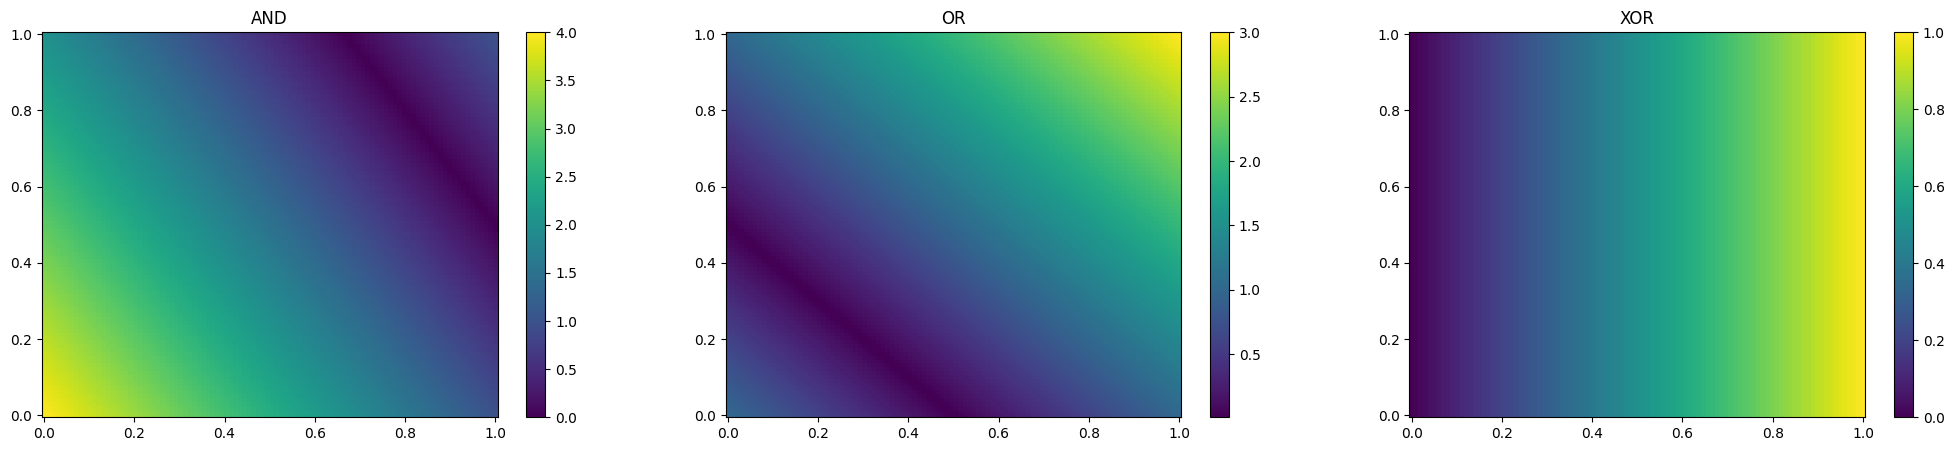

In [19]:
def plot_decision_boundary(classifier, data, labels):
    classifier.fit(data, labels)
    x_vals = np.linspace(0, 1, 100)
    y_vals = np.linspace(0, 1, 100)
    point_grid = list(product(x_vals, y_vals))
    distances = classifier.decision_function(point_grid)
    abs_distances = list(map(abs, distances))
    distances_matrix = np.array(abs_distances).reshape(100, 100)
    heatmap = plt.pcolormesh(x_vals, y_vals, distances_matrix)
    plt.colorbar(heatmap)


classifier = Perceptron(max_iter=40, random_state=22)
data = [[0, 0], [1, 0], [0, 1], [1, 1]]
labels_and = [0, 0, 0, 1]
labels_or = [0, 1, 1, 1]
labels_xor = [0, 1, 1, 0]

plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plt.title("AND")
plot_decision_boundary(classifier, data, labels_and)

plt.subplot(1, 3, 2)
plt.title("OR")
plot_decision_boundary(classifier, data, labels_or)

plt.subplot(1, 3, 3)
plt.title("XOR")
plot_decision_boundary(classifier, data, labels_xor)

plt.show()